In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("breast cancer data.csv")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values: Replace NaN with 0 or any suitable value
df = df.fillna(0)  # Replacing NaN with 0 (or use another strategy like mean, median, etc.)

# Drop the 'id' column as it is not relevant for classification
df = df.drop(columns=['id'], axis=1)

# Check if 'diagnosis' column contains valid values and convert 'M' to 1 and 'B' to 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Display basic statistics
print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [43]:
# Separate features and target
X = df.drop(columns=['diagnosis'], axis=1)
y = df['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=3)

Training samples: 398, Testing samples: 171


In [44]:
# Fit the model
dt_classifier.fit(X_train, y_train)

# Print the decision tree rules
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print(tree_rules)

# Optional: Evaluate model performance
y_pred = dt_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

|--- perimeter_worst <= 112.80
|   |--- concave points_worst <= 0.18
|   |   |--- area_se <= 35.44
|   |   |   |--- class: 0
|   |   |--- area_se >  35.44
|   |   |   |--- class: 0
|   |--- concave points_worst >  0.18
|   |   |--- class: 1
|--- perimeter_worst >  112.80
|   |--- concave points_worst <= 0.14
|   |   |--- texture_worst <= 21.85
|   |   |   |--- class: 0
|   |   |--- texture_worst >  21.85
|   |   |   |--- class: 1
|   |--- concave points_worst >  0.14
|   |   |--- class: 1

Accuracy: 0.9181286549707602
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       107
           1       1.00      0.78      0.88        64

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171

Confusion Matrix:
 [[107   0]
 [ 14  50]]


Confusion Matrix:
 [[107   0]
 [ 14  50]]


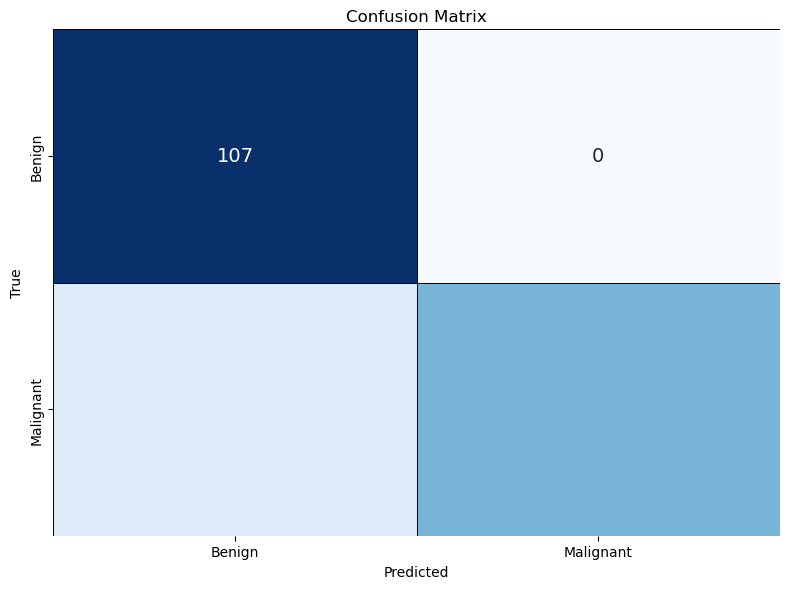

In [53]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix to verify correctness
print("Confusion Matrix:\n", conf_matrix)

# Set up the figure and adjust size
plt.figure(figsize=(8, 6))

# Plot heatmap
# Plot heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'], 
            annot_kws={"size": 14}, cbar=False, 
            linewidths=0.5, linecolor='black')  # Ensure borders between cells

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Adjust layout to prevent cutting off annotations
plt.tight_layout()
plt.show()

In [46]:
# Train a deeper tree to demonstrate overfitting
overfit_tree = DecisionTreeClassifier(random_state=42, max_depth=None)
overfit_tree.fit(X_train, y_train)

# Evaluate performance of the overfitted tree
y_pred_overfit = overfit_tree.predict(X_test)
accuracy_overfit = accuracy_score(y_test, y_pred_overfit)
print(f"Overfitted Model Accuracy: {accuracy_overfit * 100:.2f}%")

# Optimized tree with controlled depth
optimized_tree = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=10)
optimized_tree.fit(X_train, y_train)

# Evaluate performance of the optimized tree
y_pred_optimized = optimized_tree.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {accuracy_optimized * 100:.2f}%")


Overfitted Model Accuracy: 90.64%
Optimized Model Accuracy: 91.81%


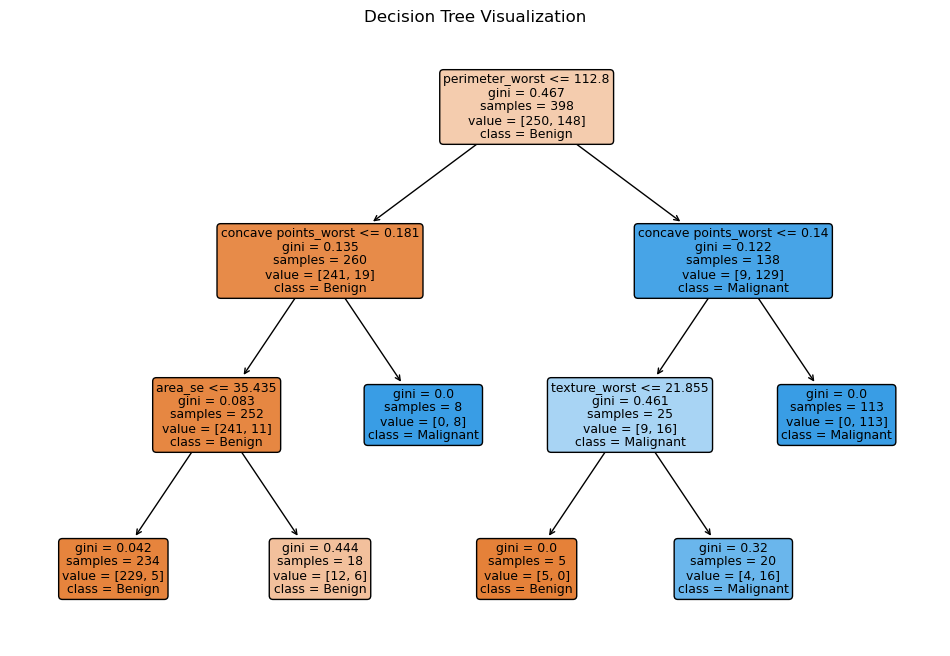

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


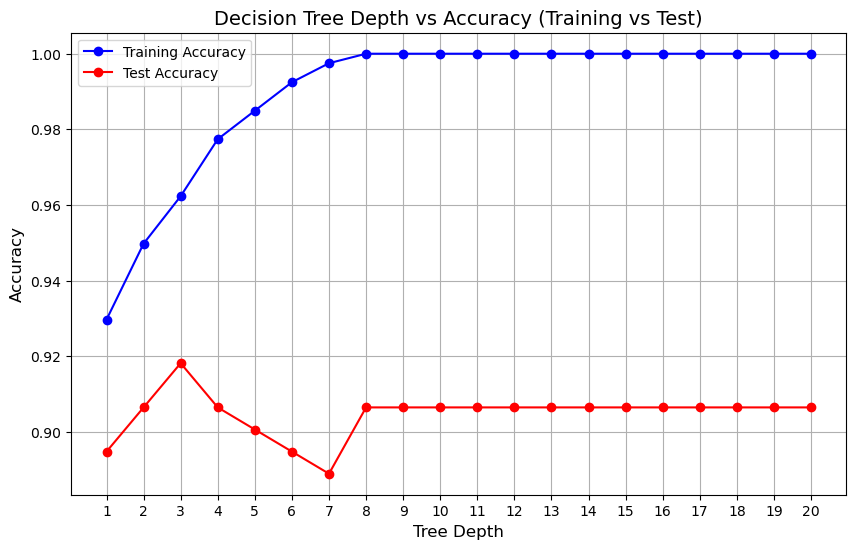

In [48]:
# Decision Tree Depth vs Accuracy (Training vs Test)
# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []
depths = range(1, 21)  # Depth values from 1 to 20

# Train decision trees with increasing depth
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracies
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', color='blue', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', color='red', marker='o')
plt.title('Decision Tree Depth vs Accuracy (Training vs Test)', fontsize=14)
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.show()

In [55]:
from sklearn.model_selection import cross_val_score

# Unpruned Decision Tree
unpruned_dt = DecisionTreeClassifier(random_state=42, criterion='gini')

# Perform Cross-Validation (5-fold)
unpruned_cv_scores = cross_val_score(unpruned_dt, X, y, cv=5, scoring='accuracy')

# Pruned Decision Tree
pruned_dt = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=3, min_samples_split=5)

# Perform Cross-Validation (5-fold)
pruned_cv_scores = cross_val_score(pruned_dt, X, y, cv=5, scoring='accuracy')

# Display the results
print("Unpruned Decision Tree Cross-Validation Scores:", unpruned_cv_scores)
print("Unpruned Decision Tree Mean Accuracy:", np.mean(unpruned_cv_scores))

print("\nPruned Decision Tree Cross-Validation Scores:", pruned_cv_scores)
print("Pruned Decision Tree Mean Accuracy:", np.mean(pruned_cv_scores))


Unpruned Decision Tree Cross-Validation Scores: [0.9122807  0.92982456 0.92105263 0.92982456 0.91150442]
Unpruned Decision Tree Mean Accuracy: 0.9208973761838225

Pruned Decision Tree Cross-Validation Scores: [0.9122807  0.92982456 0.93859649 0.94736842 0.89380531]
Pruned Decision Tree Mean Accuracy: 0.924375097034622


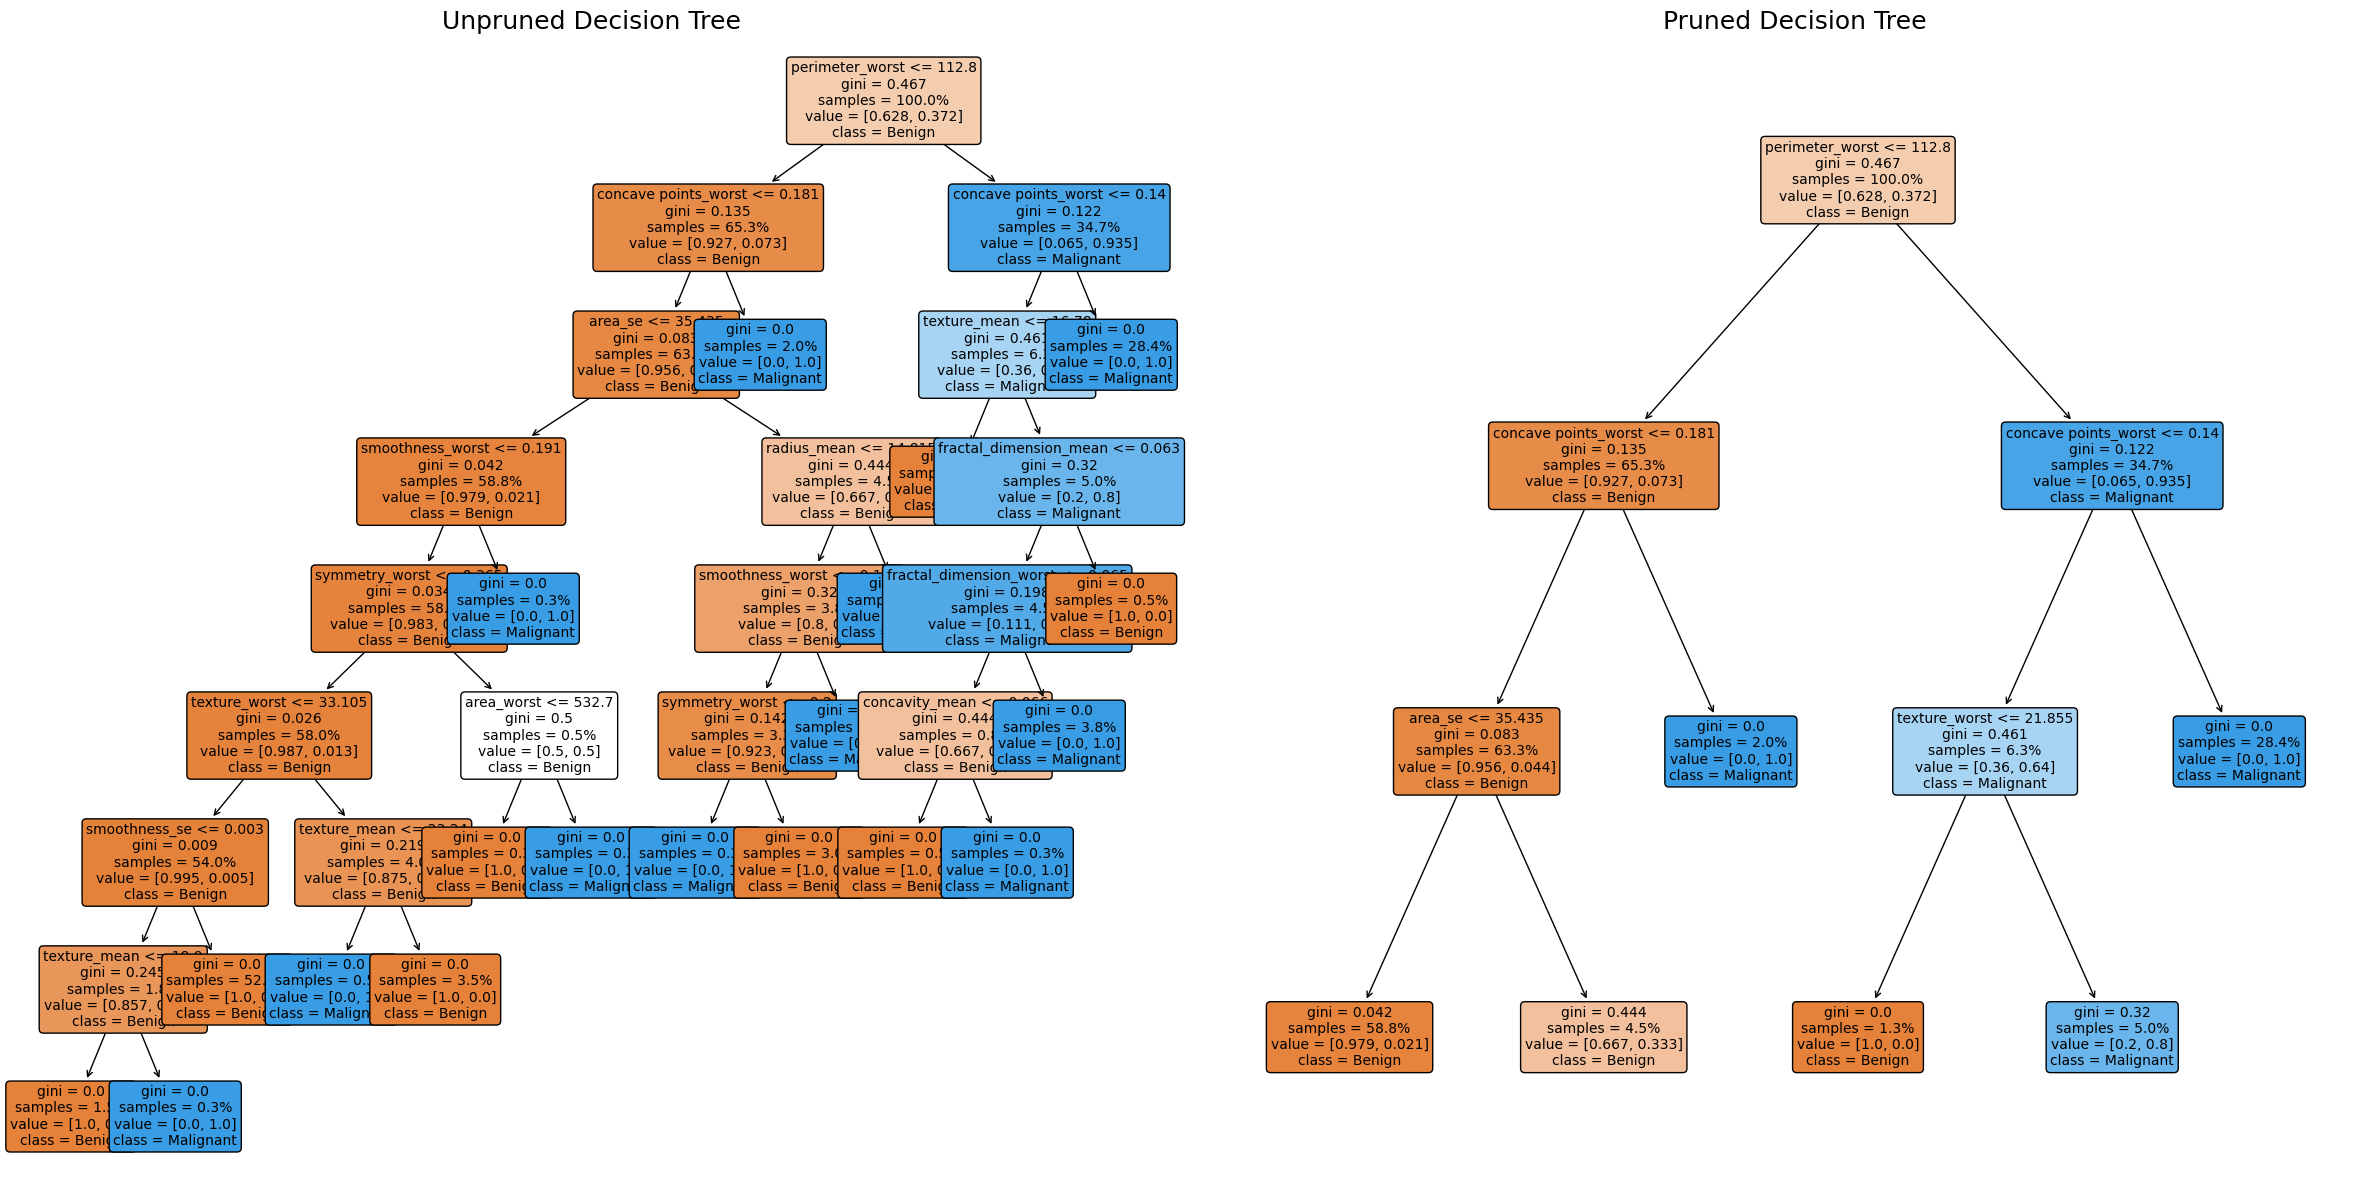

In [58]:
# Reinitialize and fit the Unpruned Decision Tree Classifier
unpruned_dt = DecisionTreeClassifier(random_state=42, criterion='gini')
unpruned_dt.fit(X_train, y_train)

# Reinitialize and fit the Pruned Decision Tree Classifier
pruned_dt = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=3, min_samples_split=5)
pruned_dt.fit(X_train, y_train)

# Visualize the Decision Trees with Larger, Clearer Plots
plt.figure(figsize=(24, 12))

# Unpruned Decision Tree
plt.subplot(1, 2, 1)
plot_tree(unpruned_dt, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize=10, proportion=True, rounded=True)
plt.title("Unpruned Decision Tree", fontsize=18)

# Pruned Decision Tree
plt.subplot(1, 2, 2)
plot_tree(pruned_dt, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize=10, proportion=True, rounded=True)
plt.title("Pruned Decision Tree", fontsize=18)

plt.tight_layout()
plt.show()
